# Calculating Sediment Flux Code

This code is how I calculated sediment flux for the tables in the paper.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from __future__ import division

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)


# Read raw text file 

The raw data is stored in the Data folder. I used pandas to read the file, and then calculate totals

In [11]:
sedTablePath = "../Data/AllCatchments_Icev03_m3_EP_October2016_CLEAN.txt"
sedTable = pd.read_csv(sedTablePath,
                       thousands=',')

# this confirms the data was read in correctly

In [14]:
sedTable

FID       F1   Field1   ADJepSSCmg       area_m2         ep_max  \
0        0     36.0     36.0     1.840070  6.750000e+04       0.007995   
1        1     37.0     37.0    56.986800  2.148750e+07      49.119700   
2        2     61.0     61.0     2.468830  1.395000e+06       0.019904   
3        3     64.0     64.0     1.964680  9.450000e+05       0.012258   
4        4     67.0     67.0     1.893870  1.586250e+07       0.053565   
5        5     71.0     71.0     1.421210  4.950000e+05       0.010171   
6        6     72.0     72.0     1.855460  6.525000e+05       0.011291   
7        7     73.0     73.0     2.057910  1.170000e+06       0.014896   
8        8     74.0     74.0     0.559265  5.850000e+05       0.004108   
9        9     76.0     76.0     3.052900  1.800000e+05       0.020112   
10      10     79.0     79.0     1.787630  1.035000e+06       0.019786   
11      11     81.0     81.0     2.280730  3.127500e+06       0.043759   
12      12     84.0     84.0     2.191120  2.812500e+06       0.057374   
13      13     85.0     85.0     2.703340  1.327500e+06       0.025968   
14      14     86.0     86.0     3.766830  1.777500e+06       0.043579   
15      15     87.0     87.0     2.575280  6.975000e+06       0.030679   
16      16     88.0     88.0     0.688893  8.325000e+05       0.012806   
17      17     89.0     89.0     3.797200  1.570500e+07       0.104510   
18      18     91.0     91.0     3.834360  2.623500e+07       0.164725   
19      19     92.0     92.0     3.313740  1.215000e+07       0.098812   
20      20     93.0     93.0     1.243620  2.722500e+06       0.016978   
21      21     97.0     97.0     5.549510  8.100000e+05       0.061240   
22      22     98.0     98.0     0.254808  6.750000e+04       0.000498   
23      23     99.0     99.0     3.641900  8.280000e+06       0.048961   
24      24    100.0    100.0     3.865260  1.935000e+06       0.050487   
25      25    101.0    101.0     1.901220  9.270000e+06       0.027031   
26      26    102.0    102.0     0.946761  1.912500e+06       0.020043   
27      27    103.0    103.0     0.577609  1.710000e+06       0.020006   
28      28    106.0    106.0     0.811697  1.575000e+05       0.006571   
29      29    109.0    109.0     9.953920  1.755000e+06       0.131705   
...    ...      ...      ...          ...           ...            ...   
9312  9312  16379.0  16379.0   116.641000  5.490000e+07     203.283000   
9313  9313  16381.0  16381.0  4093.190000  1.207600e+09  147353.000000   
9314  9314  16382.0  16382.0    69.824400  5.339250e+07      99.587100   
9315  9315  16383.0  16383.0    76.591000  1.939500e+08     242.769000   
9316  9316  16385.0  16385.0    44.985100  1.170000e+07       6.597050   
9317  9317  16386.0  16386.0    33.683600  9.900000e+05       0.827554   
9318  9318  16387.0  16387.0    37.042500  2.992500e+06       3.574560   
9319  9319  16388.0  16388.0   124.311000  7.492500e+06     117.413000   
9320  9320  16391.0  16391.0    37.824400  8.325000e+05       1.044960   
9321  9321  16392.0  16392.0    61.731500  2.135250e+07      52.438700   
9322  9322  16393.0  16393.0    27.020800  7.042500e+06      36.043400   
9323  9323  16394.0  16394.0   166.446000  2.425500e+07     199.605000   
9324  9324  16395.0  16395.0   116.141000  4.500000e+05      40.153800   
9325  9325  16396.0  16396.0   116.461000  2.947500e+06      79.074100   
9326  9326  16397.0  16397.0   546.993000  2.092500e+06     435.186000   
9327  9327  16398.0  16398.0   186.711000  2.283750e+07     243.817000   
9328  9328  16399.0  16399.0   340.034000  1.478250e+07     502.710000   
9329  9329  16400.0  16400.0   437.437000  1.237500e+06     129.952000   
9330  9330  16401.0  16401.0   328.848000  7.650000e+06     161.727000   
9331  9331  16404.0  16404.0    41.908000  2.475000e+05       0.954464   
9332  9332  16407.0  16407.0     7.680640  2.475000e+05       0.072400   
9333  9333  16409.0  16409.0    42.248000  1.388250e+07       4.383570   
9334  9334 

# Confirm Runoff Totals 

I confirm that the ruoff totals are correct (in a previous version they were off by a factor of 10)

This is the [google unit coversion ](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=446081452424.5996%20m%5E3%20in%20km%5E3) I used to check my work.

446081452424.5996 m<sup>3</sup> of water per year, is roughly 446 km<sup>3</sup>


In [13]:
sedTable['runoff_m3y'].sum()


446081452424.5996

# adjust for high SSC values

Some values were greater than the max value we had to calibrate with, so I set them to that value. 

In [17]:
#Where area is too big, and higher than max calibrated, use 4896 
sedTable['ADJepSSCmg']  = np.where(sedTable.ep_SSC_mgl>4896,
                                   4896, sedTable.ep_SSC_mgl)

In [ ]:
plt.plot(sedTable.ep_SSC_mgl,sedTable.ADJepSSCmg,'o')

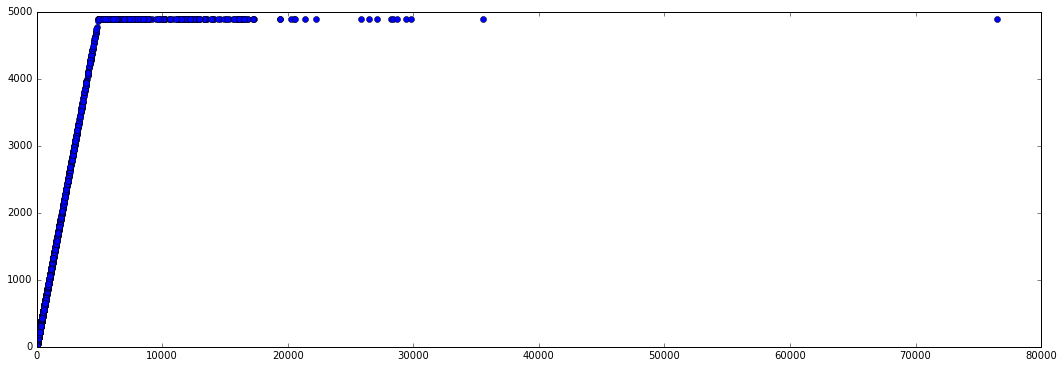

In [18]:
plt.plot(sedTable.ep_SSC_mgl,sedTable.ADJepSSCmg,'o')